In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl
import joblib
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.feature_selection import RFECV 

### Read Data

In [2]:
PATH = "loan_approval_dataset.csv"

In [3]:
df = pd.read_csv(PATH)
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


## Exploratory Data Analysis

### Understanding data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_id,4269.0,2.135000e+03,1.232498e+03,1.0,1068.0,2135.0,3202.0,4269.0
no_of_dependents,4269.0,2.498712e+00,1.695910e+00,0.0,1.0,3.0,4.0,5.0
income_annum,4269.0,5.059124e+06,2.806840e+06,200000.0,2700000.0,5100000.0,7500000.0,9900000.0
loan_amount,4269.0,1.513345e+07,9.043363e+06,300000.0,7700000.0,14500000.0,21500000.0,39500000.0
loan_term,4269.0,1.090045e+01,5.709187e+00,2.0,6.0,10.0,16.0,20.0
cibil_score,4269.0,5.999361e+02,1.724304e+02,300.0,453.0,600.0,748.0,900.0
residential_assets_value,4269.0,7.472617e+06,6.503637e+06,-100000.0,2200000.0,5600000.0,11300000.0,29100000.0
commercial_assets_value,4269.0,4.973155e+06,4.388966e+06,0.0,1300000.0,3700000.0,7600000.0,19400000.0
luxury_assets_value,4269.0,1.512631e+07,9.103754e+06,300000.0,7500000.0,14600000.0,21700000.0,39200000.0
bank_asset_value,4269.0,4.976692e+06,3.250185e+06,0.0,2300000.0,4600000.0,7100000.0,14700000.0


In [6]:
df.describe().transpose().apply(lambda s: s.apply('{0:.2f}'.format))

,count,mean,std,min,25%,50%,75%,max
loan_id,4269.00,2135.00,1232.50,1.00,1068.00,2135.00,3202.00,4269.00
no_of_dependents,4269.00,2.50,1.70,0.00,1.00,3.00,4.00,5.00
income_annum,4269.00,5059123.92,2806839.83,200000.00,2700000.00,5100000.00,7500000.00,9900000.00
loan_amount,4269.00,15133450.46,9043362.98,300000.00,7700000.00,14500000.00,21500000.00,39500000.00
loan_term,4269.00,10.90,5.71,2.00,6.00,10.00,16.00,20.00
cibil_score,4269.00,599.94,172.43,300.00,453.00,600.00,748.00,900.00
residential_assets_value,4269.00,7472616.54,6503636.59,-100000.00,2200000.00,5600000.00,11300000.00,29100000.00
commercial_assets_value,4269.00,4973155.31,4388966.09,0.00,1300000.00,3700000.00,7600000.00,19400000.00
luxury_assets_value,4269.00,15126305.93,9103753.67,300000.00,7500000.00,14600000.00,21700000.00,39200000.00
bank_asset_value,4269.00,4976692.43,3250185.31,0.00,2300000.00,4600000.00,7100000.00,14700000.00


In [7]:
# check missing values
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [8]:
# check duplicated values
df.duplicated().sum() 

0

In [9]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [10]:
# remove white space from column names
df.columns = df.columns.str.replace(' ', '') 

In [11]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [12]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [13]:
df = df.drop('loan_id',axis=1)

In [14]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [15]:
# no_of_dependents, education, self_employed, loan_term, loan_status
# Function that draws a bar chart to see the distribution of countable categorical data
def print_value_counts(df, col_name):
    fig = plt.figure(figsize=(5,3))
    ax = sns.countplot(x=col_name, data=df)
    ax.bar_label(ax.containers[0])
    plt.show()

In [16]:
# income_annum, loan_amount, cibil_score, residential_assets_value, commercial_assets_value, luxury_assets_value, bank_asset_value
# Function that draws a density histogram to see the distribution of numeric data
def print_histogram(df, col_name):
    fig = plt.figure(figsize=(5,3))
    ax = df[col_name].hist(density=True, alpha=0.3)
    df[col_name].plot(kind='density')
    ax.set(xlabel=col_name)
    plt.show()

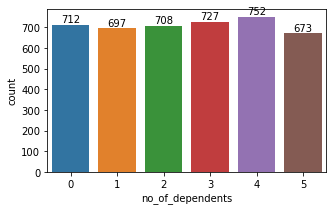

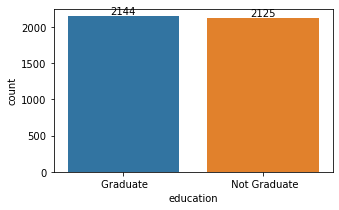

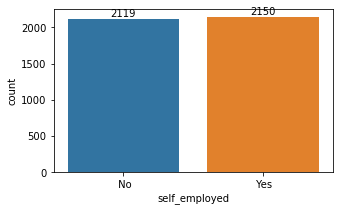

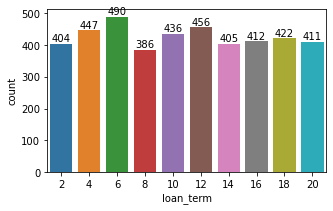

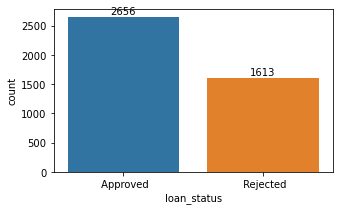

In [17]:
coll_arr_val_counts = ["no_of_dependents", "education", "self_employed", "loan_term", "loan_status"]
for col_name in coll_arr_val_counts:
    print_value_counts(df, col_name)

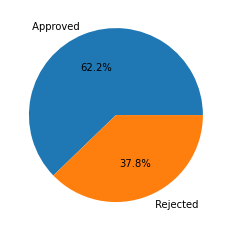

In [18]:
loan_status = df["loan_status"].value_counts()
plt.pie(loan_status.values, labels=loan_status.index, autopct='%1.1f%%')
plt.show()

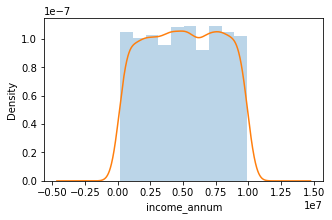

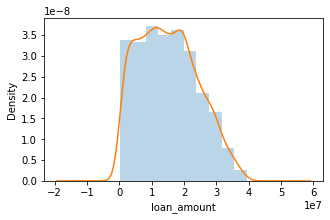

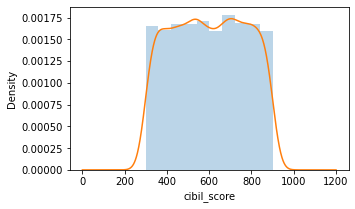

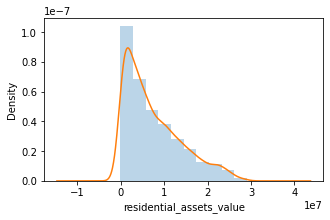

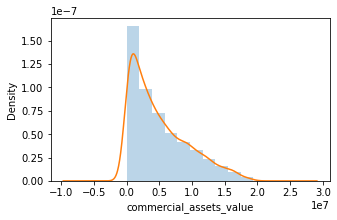

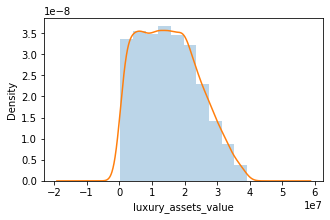

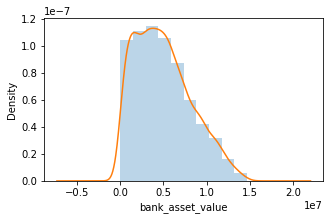

In [19]:
col_arr_hist = ["income_annum", "loan_amount", "cibil_score", "residential_assets_value", "commercial_assets_value", "luxury_assets_value", "bank_asset_value"]
for col_name in col_arr_hist:
    print_histogram(df, col_name)

* None of them is normally distributed 

### Preprocessing

In [20]:
categorical_col = ["education","self_employed","loan_status"]
numeric_col = [col for col in df.columns if col not in categorical_col]

In [21]:
le = LabelEncoder()

for col in categorical_col:
    df[col]=le.fit_transform(df[col])

In [22]:
# Min max scaler is chosen instead of Standard Scaler because the data is not normally distributed
scaler = MinMaxScaler() 

for col in numeric_col:
    df[[col]] = scaler.fit_transform(df[[col]])

In [23]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,0.4,0,0,0.969072,0.755102,0.555556,0.796667,0.085616,0.907216,0.575835,0.544218,0
1,0.0,1,1,0.402062,0.303571,0.333333,0.195000,0.095890,0.113402,0.218509,0.224490,1
2,0.6,0,0,0.917526,0.750000,1.000000,0.343333,0.246575,0.231959,0.848329,0.870748,1
3,0.6,0,0,0.824742,0.775510,0.333333,0.278333,0.626712,0.170103,0.591260,0.537415,1
4,1.0,1,1,0.989691,0.609694,1.000000,0.136667,0.428082,0.422680,0.748072,0.340136,1


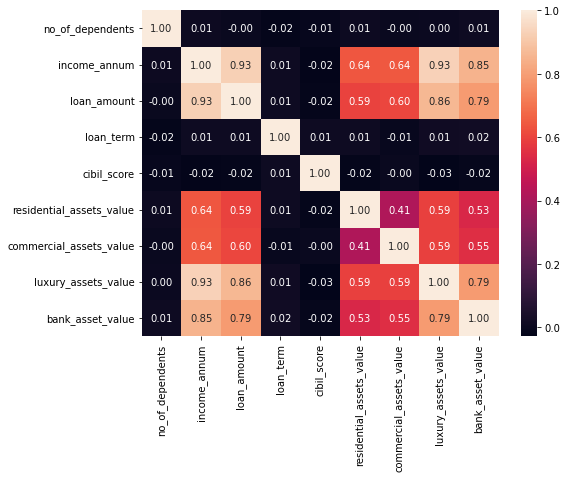

In [24]:
# corrolation matrix
numeric_df = df.loc[:, numeric_col]
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f')
plt.show()

* loan_amount proportional to higher value income_annum

<AxesSubplot:xlabel='income_annum', ylabel='loan_amount'>

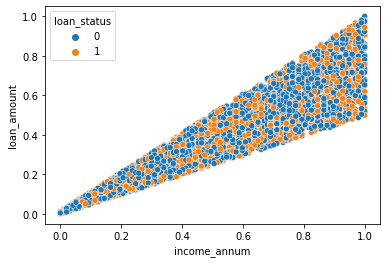

In [25]:
sns.scatterplot(data=df, x="income_annum", y="loan_amount",  hue="loan_status")

### Feature Selection

In [26]:
X = df.drop("loan_status",axis = 1)
y = df["loan_status"]

classifier = RandomForestClassifier()
feature_selector = RFECV(classifier)

fit = feature_selector.fit(X,y)

In [27]:
optimal_feature_count = feature_selector.n_features_
print(f"Optimal number of features: {optimal_feature_count}")

Optimal number of features: 4


In [28]:
X_new = X.loc[:, feature_selector.get_support()]
X_new

,income_annum,loan_amount,loan_term,cibil_score
0,0.969072,0.755102,0.555556,0.796667
1,0.402062,0.303571,0.333333,0.195000
2,0.917526,0.750000,1.000000,0.343333
3,0.824742,0.775510,0.333333,0.278333
4,0.989691,0.609694,1.000000,0.136667
...,...,...,...,...
4264,0.082474,0.051020,0.555556,0.028333
4265,0.319588,0.280612,1.000000,0.431667
4266,0.649485,0.602041,0.888889,0.261667
4267,0.402062,0.318878,0.333333,0.800000


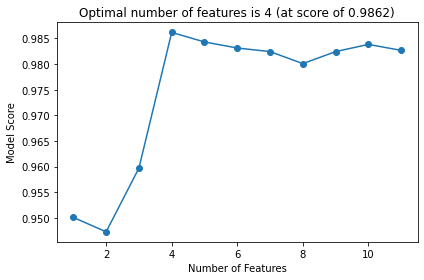

In [29]:
plt.plot(range(1, len(fit.grid_scores_) + 1), fit.grid_scores_, marker = "o")
plt.ylabel("Model Score")
plt.xlabel("Number of Features")
plt.title(f"Optimal number of features is {optimal_feature_count} (at score of {round(max(fit.grid_scores_), 4)})")
plt.tight_layout() 
plt.show()

**Looking at the number of features in the feature selection chart, fetaure number 4 and above are sufficient to explain the model. Here, model complexity can be reduced with a smaller model by keeping the number of features low. 4 feature will be enough to explain the model.**

In [30]:
X_new

,income_annum,loan_amount,loan_term,cibil_score
0,0.969072,0.755102,0.555556,0.796667
1,0.402062,0.303571,0.333333,0.195000
2,0.917526,0.750000,1.000000,0.343333
3,0.824742,0.775510,0.333333,0.278333
4,0.989691,0.609694,1.000000,0.136667
...,...,...,...,...
4264,0.082474,0.051020,0.555556,0.028333
4265,0.319588,0.280612,1.000000,0.431667
4266,0.649485,0.602041,0.888889,0.261667
4267,0.402062,0.318878,0.333333,0.800000


In [31]:
y

0       0
1       1
2       1
3       1
4       1
       ..
4264    1
4265    0
4266    1
4267    0
4268    0
Name: loan_status, Length: 4269, dtype: int64

## Model Training

In [32]:
models = {
    'Logistic Regression':LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'DecisionTreeClassifer':DecisionTreeClassifier(),
    'SVM':SVC(),
    'XGB Classifier': XGBClassifier()
}

### Using All Features

In [33]:
X = df.drop(columns=['loan_status']) 
y = df["loan_status"]

In [34]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [35]:
for i in range(len(models)):
    model = list(models.values())[i]
    model_name = list(models.keys())[i]
    cross_val_scores = cross_val_score(model, X, y, cv=kf)
    print(model_name)
    print(cross_val_scores)
    print(cross_val_scores.mean())

Logistic Regression
[0.91217799 0.90515222 0.91686183 0.91920375 0.92966002]
0.916611161597997
RandomForestClassifier
[0.9824356  0.98477752 0.98009368 0.98360656 0.98710434]
0.9836035373156046
DecisionTreeClassifer
[0.97775176 0.98009368 0.98009368 0.9765808  0.97772567]
0.9784491160829253
SVM
[0.92740047 0.92974239 0.93676815 0.93559719 0.95310668]
0.9365229758038168
XGB Classifier
[0.9824356  0.98946136 0.98009368 0.98711944 0.98358734]
0.9845394818123664


### Using Selected Features

In [36]:
for i in range(len(models)):
    model = list(models.values())[i]
    model_name = list(models.keys())[i]
    cross_val_scores = cross_val_score(model, X_new, y, cv=kf)
    print(model_name)
    print(cross_val_scores)
    print(cross_val_scores.mean())

Logistic Regression
[0.91217799 0.90866511 0.92037471 0.91569087 0.93083236]
0.9175482042989203
RandomForestClassifier
[0.98360656 0.98360656 0.98477752 0.98594848 0.98475967]
0.9845397563634067
DecisionTreeClassifer
[0.98009368 0.98594848 0.98360656 0.98594848 0.98358734]
0.9838369056999541
SVM
[0.95316159 0.96604215 0.96252927 0.96135831 0.97655334]
0.9639289352086999
XGB Classifier
[0.98711944 0.98477752 0.9824356  0.99297424 0.98475967]
0.9864132926631726


### Final Model Performance with Selected Features

Actually, when the model is trained using all features, a similar successful performance will be achieved. 

But, using fewer features in a machine learning model can offer several advantages:
 - Reduced Overfitting
 - Computational Efficiency
 - Reduced Complexity
 - Less Data Needed
 - Less Sensitivity to Outliers and Noise

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X_new,y,shuffle = True,random_state=42,test_size=0.2)

In [38]:
for i in range(len(models)):
    model = list(models.values())[i]
    model_name = list(models.keys())[i]
    
    model.fit(X_train,y_train)
    
    y_pred = model.predict(X_test)
    
    print(model_name)
    print("Accuracy : ",accuracy_score(y_test,y_pred))
    print(classification_report(y_test, y_pred))
    print('------------------------------------------------------')

Logistic Regression
Accuracy :  0.9121779859484778
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       536
           1       0.89      0.88      0.88       318

    accuracy                           0.91       854
   macro avg       0.91      0.91      0.91       854
weighted avg       0.91      0.91      0.91       854

------------------------------------------------------
RandomForestClassifier
Accuracy :  0.9847775175644028
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       536
           1       0.99      0.97      0.98       318

    accuracy                           0.98       854
   macro avg       0.99      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

------------------------------------------------------
DecisionTreeClassifer
Accuracy :  0.9800936768149883
              precision    recall  f1-score   support

           0       0.99

In [39]:
model = XGBClassifier() 

model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print(accuracy_score(y_test,y_pred))

0.9871194379391101


In [40]:
print("Accuracy : ",accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

Accuracy :  0.9871194379391101
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       536
           1       0.99      0.97      0.98       318

    accuracy                           0.99       854
   macro avg       0.99      0.98      0.99       854
weighted avg       0.99      0.99      0.99       854



**Since XGBoost doesn't require feature scaling, we can train model with selected features without scaling**

In [41]:
df_last = pd.read_csv(PATH)
df_last.columns = df_last.columns.str.replace(' ', '') 

In [42]:
X = df_last[X_new.columns]
y = df["loan_status"]

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,shuffle = True,random_state=42,test_size=0.2)

In [44]:
model = XGBClassifier() 

model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print(accuracy_score(y_test,y_pred))

0.9871194379391101


In [45]:
print("Accuracy : ",accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

Accuracy :  0.9871194379391101
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       536
           1       0.99      0.97      0.98       318

    accuracy                           0.99       854
   macro avg       0.99      0.98      0.99       854
weighted avg       0.99      0.99      0.99       854



## Final Model

**Since kfold is balanced, model training can be done using the entire dataset.**

In [46]:
X

,income_annum,loan_amount,loan_term,cibil_score
0,9600000,29900000,12,778
1,4100000,12200000,8,417
2,9100000,29700000,20,506
3,8200000,30700000,8,467
4,9800000,24200000,20,382
...,...,...,...,...
4264,1000000,2300000,12,317
4265,3300000,11300000,20,559
4266,6500000,23900000,18,457
4267,4100000,12800000,8,780


In [47]:
y

0       0
1       1
2       1
3       1
4       1
       ..
4264    1
4265    0
4266    1
4267    0
4268    0
Name: loan_status, Length: 4269, dtype: int64

In [48]:
model = XGBClassifier() 

model.fit(X, y)

joblib.dump(model,"model.pkl")

['model.pkl']